# Diretórios e Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy pandas seaborn matplotlib scikit-learn joblib --quiet

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Dataframe

In [4]:
bootcamp_train_df = pd.read_csv('/content/drive/MyDrive/Bootcamp CDIA/model/data/real_normalized_data.csv')
bootcamp_train_df.head()

,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,comprimento_do_transportador,...,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,tipo_do_aço_A300,tipo_do_aço_A400,targets
0,0.010088,0.096019,0.005745,0.019629,0.002725,0.019639,0.021127,0.003126,0.375000,0.241623,...,0.302568,0.315567,0.388761,0.403242,0.537584,0.206683,0.078776,0,1.0,7.0
1,0.073431,0.315574,0.040413,0.138076,0.005411,0.005499,0.026761,0.000588,0.414773,0.238095,...,0.124762,0.196206,0.251801,0.359553,0.531924,0.020485,0.072266,0,1.0,8.0
2,0.002686,0.123536,0.061259,0.209306,0.248529,0.214454,0.185915,0.215403,0.278409,0.231041,...,0.833310,0.700299,0.643120,0.173124,0.351036,1.000000,0.024740,0,1.0,3.0
3,0.008450,0.088993,0.001807,0.006174,0.010665,0.029065,0.033803,0.010999,0.329545,0.238095,...,0.458638,0.413328,0.460627,0.341354,0.472821,0.796635,0.072266,0,1.0,3.0
4,0.028560,0.255855,0.112279,0.040608,0.002251,0.011783,0.021127,0.001950,0.221591,0.227513,...,0.281659,0.172082,0.443264,0.835084,0.332973,0.093957,0.055990,0,0.0,8.0


In [5]:
X = bootcamp_train_df.drop('targets', axis=1)
y = bootcamp_train_df['targets']

# Divisão de Subconjuntos

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    train_size=0.80)

# Treinamento do Modelo

In [7]:
svm = joblib.load(filename='/content/drive/MyDrive/Bootcamp CDIA/model/classifiers/svm67.pkl')
xgb = joblib.load(filename='/content/drive/MyDrive/Bootcamp CDIA/model/classifiers/xgb69.pkl')

In [8]:
voting_classifier = VotingClassifier(estimators=[('svm', svm), ('xgb', xgb)])
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('svm', SVC(kernel='poly', probability=True)),
                             ('xgb',
                              OneVsRestClassifier(estimator=XGBClassifier(alpha=np.int64(6),
                                                                          base_score=None,
                                                                          booster='dart',
                                                                          callbacks=None,
                                                                          colsample_bylevel=None,
                                                                          colsample_bynode=None,
                                                                          colsample_bytree=None,
                                                                          device=None,
                                                                          early_stopping_rounds=None,
                                                                          enable_categorical=False,
                                                                          eta=np.float64(0.2),
                                                                          eval_metric...
                                                                          gamma=np.int64(0),
                                                                          grow_policy=None,
                                                                          importance_type=None,
                                                                          interaction_constraints=None,
                                                                          lambda=np.int64(10),
                                                                          learning_rate=None,
                                                                          max_bin=None,
                                                                          max_cat_threshold=None,
                                                                          max_cat_to_onehot=None,
                                                                          max_delta_step=None,
                                                                          max_depth=np.int64(7),
                                                                          max_leaves=np.int64(65),
                                                                          min_child_weight=None,
                                                                          missing=nan,
                                                                          monotone_constraints=None,
                                                                          multi_strategy=None,
                                                                          n_estimators=None, ...)))])

In [9]:
predict = voting_classifier.predict(x_test)

In [10]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         3.0       0.94      0.96      0.95       129
         5.0       0.64      0.37      0.47        19
         6.0       0.50      0.65      0.56       161
         7.0       0.61      0.63      0.62       234
         8.0       0.90      0.54      0.68       127

    accuracy                           0.67       670
   macro avg       0.72      0.63      0.65       670
weighted avg       0.70      0.67      0.68       670



In [11]:
metrics = confusion_matrix(y_test, predict)

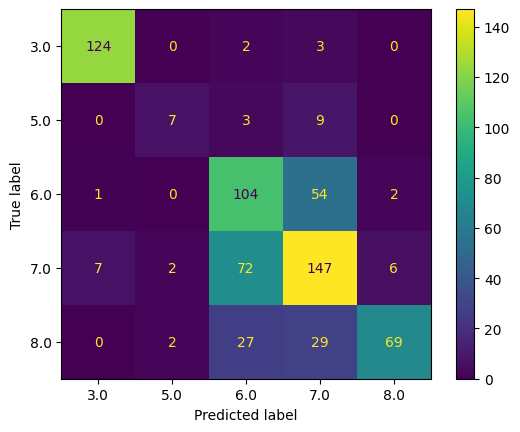

In [12]:
ConfusionMatrixDisplay(confusion_matrix=metrics,
                              display_labels=voting_classifier.classes_).plot()

In [13]:
joblib.dump(voting_classifier, 'voting_clf67.pkl')

['voting_clf67.pkl']